In [67]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score   
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Q. Classification with Iris Dataset using Sklearn Perceptron Objective: Use the Perceptron classifier from SKlearn to classify the Iris dataset (use data points of any two classes of your choice and do the classification).

In [68]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
iris = load_iris()
x, y = iris.data, iris.target

In [69]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [70]:
selected_classes = df[df['target'].isin([0, 1])]

In [71]:
selected_classes

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [72]:
x = selected_classes.iloc[:, :-3]
y = selected_classes['target']

In [73]:
x

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
95,5.7,3.0
96,5.7,2.9
97,6.2,2.9
98,5.1,2.5


In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [75]:
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
model.fit(x_train, y_train)

Perceptron(random_state=42)

In [76]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


c:\Users\kanih\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


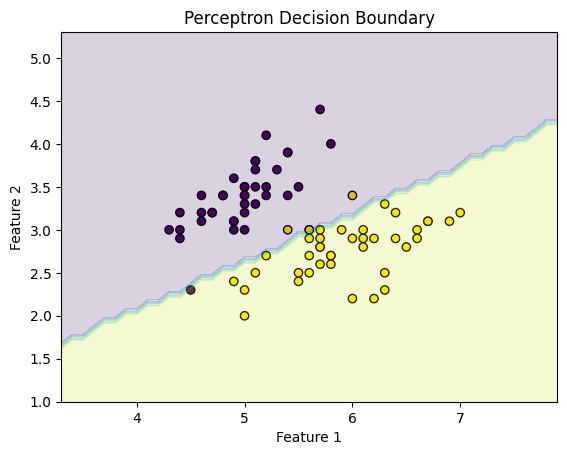

In [83]:
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=y_train, cmap='viridis', marker='o', edgecolor='k')

x_min, x_max = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
y_min, y_max = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')
plt.show()

Q. Classification with Iris Dataset using TensorFlow Objective: Use a single layer dense network classifier from TensorFlow to classify the Iris dataset (use data points of any two classes of your choice and do the classification). Plotting of training-validation loss and accuracy is necessary.

In [84]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(4,))])
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),loss='binary_crossentropy',metrics=['accuracy'])

c:\Users\kanih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(x_train, y_train,epochs=100,validation_data=(X_val, y_val),verbose=1)